<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#卷积神经网络" data-toc-modified-id="卷积神经网络-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>卷积神经网络</a></span><ul class="toc-item"><li><span><a href="#CBAPD部分" data-toc-modified-id="CBAPD部分-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>CBAPD部分</a></span></li><li><span><a href="#cifar数据实例" data-toc-modified-id="cifar数据实例-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>cifar数据实例</a></span></li></ul></li><li><span><a href="#循环神经网络" data-toc-modified-id="循环神经网络-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>循环神经网络</a></span><ul class="toc-item"><li><span><a href="#循环神经网络" data-toc-modified-id="循环神经网络-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>循环神经网络</a></span></li><li><span><a href="#字母预测" data-toc-modified-id="字母预测-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>字母预测</a></span><ul class="toc-item"><li><span><a href="#one_hot实现字母预测" data-toc-modified-id="one_hot实现字母预测-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>one_hot实现字母预测</a></span></li><li><span><a href="#独热编码和embedding：" data-toc-modified-id="独热编码和embedding：-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>独热编码和embedding：</a></span></li></ul></li><li><span><a href="#股票预测" data-toc-modified-id="股票预测-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>股票预测</a></span><ul class="toc-item"><li><span><a href="#RNN股票预测" data-toc-modified-id="RNN股票预测-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>RNN股票预测</a></span></li><li><span><a href="#LSTM预测股票" data-toc-modified-id="LSTM预测股票-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>LSTM预测股票</a></span></li><li><span><a href="#GRU预测股票" data-toc-modified-id="GRU预测股票-7.3.3"><span class="toc-item-num">7.3.3&nbsp;&nbsp;</span>GRU预测股票</a></span></li></ul></li></ul></li></ul></div>

# 卷积神经网络

     全连接网络NN：每个神经元都与前后相邻层的每一个神经元有链接，输入时特征，输出时预测结果。
     参数个数：sum(前层*后层+后层)每一层。
     实践证明，全连接网络对识别和预测都有很好的效果，但是对于像三通道图像数据，就会生成大量待估参数。

    卷积计算式是一种有效提取图像特征的方法，
    一般会用一个正方形的卷积核，按照指定步长，在输入特征上滑动，遍历输入特征图中的每个像素点，每一个步长，卷积核会与输入特征图出现重合区域，重合区域对应元素相乘，求和再加上偏置项得到输出特征的一个像素点


    本讲目标：***卷积就是特征提取器，CBAPD***
    卷积计算过程  
    感受野
    全零填充padding
    tf描述卷积计算层
    批标准化 batch normalization ,BN
    池化 pooling
    舍弃 dropout
    卷积神经网络
    cifar10数据集
    搭建实例
    实现LeNet,AlexNet,VGGNet,InceptionNet,ResNet 5个经典神经网络


## CBAPD部分

In [ ]:
# 感受野receptive filed:卷积神经网络各输出特征图中一个像素点，在原始输入特片上映射区域的大小
# 两层3*3的卷积核和一层5*5的卷积核的感受野相同，但是带训练参数前者更小，计算量更小，所以，一般选择前者

# 全零填充 padding='SAME' or 'VALID'
#     SAME全零填充，保证输出特征图大小和原来一样，入长/步长，向上取整
#     VALID非全零填充，(入长-核长+1)/步长，向上取整
 
tf描述卷积计算过程：
tf.keras.layers.Conv2D(
    filters=卷积核个数，
    kernal_size = 卷积和尺寸，正方形写核长整数，或者(核高，核宽)
    strides = 滑动步长，默认1，
    paddings = 'same' or 'valid',
    activation = 'relu' or 'softmax' or 'sigmoid' or 'tanh',若有BN,此处不写
    input_shape = (高，宽，通道数)
)



In [ ]:
# 批标准化：随着网络层数增加，特征数据会出现偏离0均值的情况，在卷积操作和激活操作之间进行
# 对每批进入神经网络的数据，每个输出特征图按照本图的均值和标准差进行批标准化，
# 该操作将本来偏移零均值的数据拉回零均值附近，BN操作可以使得进入激活函数的数据分布在激活函数线性区，数据微小的变化更明显的提现到激活函数的输出，提升了激活函数对输入数据的敏感性。
# 但是这种简单的数据标准化也会使得数据集中在激活函数的线性区域中，使得激活函数丧失了非线性的特性。
# 因此在BN操作中为每个卷积核引入两个可以训练的参数gama缩放因子和beta偏移因子，优化了特征数据分布的宽窄和偏移量，可在反向传播时一起被训练优化，
model = tf.keras.models.Sequential([
    Conv2D(filters=6,kernal_size=5,padding='same'),  #卷积层
    BatchNormalization(),  #BN层
    Activation('rule'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
    Dropout=(0.2)
])

In [ ]:
# 池化：用于减少特征数量，主要方法有最大池化和均值池化，最大池化提取图片纹理，均值池化保留背景特征
# tf 描述池化：
tf.keras.layers.MaxPool2D(
    pool_size=池化核尺寸，正方形写核长整数，或者（核高h,核宽w）
    strides=池化步长，步长整数，或者（纵步h,横步w）默认pool_size,
    padding='valid' or 'same'
)

tf.keras.layers.AveragePool2D(
    pool_size=池化核尺寸，正方形写核长整数，或者（核高h,核宽w）
    strides=池化步长，步长整数，或者（纵步h,横步w）默认pool_size,
    padding='valid' or 'same'
)
# 实例如上

In [ ]:
# 舍弃：神经网络训练时为了缓解过拟合，将一部分神经元按照一定概率舍弃，使用时，恢复舍弃的神经元
# 实例如上dropout=(0.2)

# 卷积神经网络：借助卷积核提取特征，送入全连接网络。
# 主要模块：卷积C》批标准化B》激活函数A》池化P》舍弃D》全链接FC


## cifar数据实例

    5万张32*32像素点的十分类彩色图片和标签，训练集
    1万张32*32像素点的十分类图片和标签，测试集


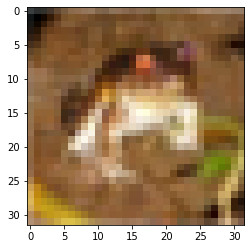

x_train[0]:
 [[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294

In [1]:
# 导入数据集，十分类分别是飞机汽车鸟猫鹿狗青蛙马船和卡车
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os


# np.set_printoptions(threshold=np.inf)
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

plt.imshow(x_train[0])
plt.show()
print('x_train[0]:\n',x_train[0])
print('y_train[0]:\n',y_train[0])
print('x_train.shape:\n',x_train.shape)
print('y_train.shape:\n',y_train.shape)
print('x_test.shape:\n',x_test.shape)
print('y_test.shape:\n',y_test.shape)

In [3]:
# 搭建一层卷积两层全连接网络
#sequencial搭建结构
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6,kernel_size=5,strides=2,padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

### class搭建网络
# from tensorflow.keras.layers import Conv2D,BatchNormalization,Activation,MaxPool,Faltten,Dense,Dropout
# from tf.keras import Model
# class Bashline(Model):
#     def __init__(self,Model):
#         super(Bashline,self).__init__()
#         self.c1 = Conv2D(filters=6,kernel_size=5,strides=2,padding='same')
#         self.b1 = BatchNormalization()
#         self.a1 = Activation('relu')
#         self.p1 = MaxPool2D(pool_size=(2,2),strides=2,padding='same')
#         self.d1 = Dropout(0.2)
#         self.flatten = Flatten()
#         self.f1 = Dense(128,activation='relu')
#         self.d2 = Dropout(0.2)
#         self.f2 = Dense(10,activation='softmax')
#     def call(self,x):
#         x = self.c1(x)
#         x = self.b1(x)
#         x = self.a1(x)
#         x = self.p1(x)
#         x = self.d1(x)
#         x = self.flatten(x)
#         x = self.f1(x)
#         x = self.d2(x)
#         y = self.f2(x)
#         return y
# model = Bashline()
            
    
#配置参数
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy']
)

# 断点续训
checkpoint_save_path = 'D:/tensorflow笔记/class5/checkpoint/Baseline.ckpt'  #ckpt文件会生成对应的index文件
if os.path.exists(checkpoint_save_path + '.index'):
    print('-----------load model----------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_save_path,
    save_weights_only = True,
    save_best_only= True)
history=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test),validation_freq=1,
         callbacks=[cp_callback])
model.summary()

# 保存参数
file=open('D:/tensorflow笔记/class5/weights.txt','w')
for v in model.trainable_variables:
    file.write(str(v.name)+'\n')
    file.write(str(v.shape)+'\n')
    file.write(str(v.numpy())+'\n')
file.close()

# 显示acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1,2,1)
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'tf'

In [6]:
# 经典神经网络LeNet(1998) > AlexNet(2012) > VGGNet(2014) > InceptionNet(2014) > ResNet(2015)
# LeNet:通过共享卷积核减少参数，共有5层，两层卷积，两层全连接（一般只把卷积层和全连接层看成一层，其他的是层中附属）
from tensorflow.keras import Model
class LeNet5(Model):
    def __init__(self):
        super(LeNet5,self).__init__()
        self.c1 = Conv2D(filters=6,kernel_size=(5,5),activation='sigmoid')
        self.p1 = MaxPool2D(pool_size=(2,2),strides=2)
        self.c2 = Conv2D(filters=16,kernel_size=(5,5),activation='sigmoid')
        self.p2 = MaxPool2D(pool_size=(2,2),strides=2)
        
        self.flatten = Flatten()
        self.f1 = Dense(120,activation='sigmoid')
        self.f2 = Dense(84,activation='sigmoid')
        self.f3 = Dense(10,activation='softmax')
    def call(self):
        x = self.c1(x)
        x = self.p1(x)
        x = self.c2(x)
        x = self.p2(x)
        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y
    

In [8]:
# AlexNet共有8层:5层卷积，3层全连接
# 使用relu激活函数，提升训练速度，使用dropout缓解过拟合
class AlexNet8(Model):
    def __ini__(self):
        super(AlexNet8,self).__init__()
        self.c1 = Conv2D(filters=96,kernel_size=(3,3))
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(3,3),strides=2)
        
        self.c2 = Conv2D(filters=256,kernel_size=(3,3))
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        self.p2 = MaxPool2D(pool_size=(3,3),strides=2)
        
        self.c3 = Conv2D(filters=384,kernel_size=(3,3),padding='same')
        self.a3 = Activation('relu')
        
        self.c4 = Conv2D(filter=384,kernel_size=(3,3),padding='same')
        self.a4 = Activation('relu')
        
        self.c5 = Conv2D(filter=256,kernel_size=(3,3),padding='same')
        self.a5 = Activation('relu')
        self.p5 = MaxPool2D(pool_size=(3,3),strides=2)
        
        self.flatten = Faltten()
        self.f6 = Dense(filters=2048,activation='relu')
        self.d6 = Dropout(0.5)
        
        self.f7 = Dense(filters=2048,activation='relu')
        self.d7 = Dropout(0.5)
        
        self.f8 = Dense(filters=10,activation='softmax')


In [ ]:
# VGGNet：使用小尺寸卷积核，在减少参数的同时，提高了识别的准确率
# 该网络结构规整，适合并行加速，非常适合硬件加速，13层卷积，3层全连接
# 越靠后卷积核数量越多，因为，特征图尺寸越小，
# 通过增加卷积核的个数，增加了特征图的深度，从而保持了信息的承载能力
class VGG16(Model):
    def __ini__(self):
        super(VGG16,self).__init__()
        self.c1 = Conv2D(filters=64,kernel_size=(3,3),padding='same')
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        
        self.c2 = Conv2D(filters=64,kernel_size=(3,3),padding='same')
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        self.p2 = MaxPool2D(pool_size=(2,2),strides=2,padding='same')
        self.d2 = Dropout(0.2)
        
        self.c3 = Conv2D(filters=128,kernel_size=(3,3),padding='same')
        self.b3 = BatchNormalization()
        self.a3 = Activation('relu')
        
        self.c4 = Conv2D(filters=128,kernel_size=(3,3),padding='same')
        self.b4 = BatchNormalization()
        self.a4 = Activation('relu')
        self.p4 = MaxPool2D(pool_size=(2,2),strides=2,padding='same')
        self.d4 = Dropout(0.2)
        
        self.c5 = Conv2D(filters=256,kernel_size=(3,3),padding='same')
        self.b5 = BatchNormalization()
        self.a5 = Activation('relu')
        
        self.c6 = Conv2D(filters=256,kernel_size=(3,3),padding='same')
        self.b6 = BatchNormalization()
        self.a6 = Activation('relu')
        
        self.c7 = Conv2D(filters=256,kernel_size=(3,3),padding='same')
        self.b7 = BatchNormalization()
        self.a7 = Activation('relu')
        self.p7 = MaxPool2D(pool_size=(2,2),strides=2,padding='same')
        self.d7 = Dropout(0.2)
        
        self.c8 = Conv2D(filters=512,kernel_size=(3,3),padding='same')
        self.b8 = BatchNormalization()
        self.a8 = Activation('relu')
        
        self.c9 = Conv2D(filters=512,kernel_size=(3,3),padding='same')
        self.b9 = BatchNormalization()
        self.a9 = Activation('relu')
        
        self.c10 = Conv2D(filters=512,kernel_size=(3,3),padding='same')
        self.b10 = BatchNormalization()
        self.a10 = Activation('relu')
        self.p10 = MaxPool2D(pool_size=(2,2),strides=2,padding='same')
        self.d10 = Dropout(0.2)
        
        self.c11 = Conv2D(filters=512,kernel_size=(3,3),padding='same')
        self.b11 = BatchNormalization()
        self.a11 = Activation('relu')
        
        self.c12 = Conv2D(filters=512,kernel_size=(3,3),padding='same')
        self.b12 = BatchNormalization()
        self.a12 = Activation('relu')
        
        self.c13 = Conv2D(filters=512,kernel_size=(3,3),padding='same')
        self.b13 = BatchNormalization()
        self.a13 = Activation('relu')
        self.p13 = MaxPool2D(pool_size=(2,2),strides=2,padding='same')
        self.d13 = Dropout(0.2)
        
        self.flatten = Faltten()
        self.f14 = Dense(filters=512,activation='relu')
        self.d14 = Dropout(0.2)
        
        self.f15 = Dense(filters=512,activation='relu')
        self.d15 = Dropout(0.2)
        
        self.f16 = Dense(filters=10,activation='softmax')


In [ ]:
# InceptionNet核心：inception结构块
# 该结构块由四部分祖成，(1*1的卷积核)(1*1叠加3*3卷积核)(1*1叠加5*5卷积核),(3*3pool叠加1*1卷积核)
# 两个inceptionz组合成一个block
# 同一层网络使用不同尺寸的卷积核，可以提取不同尺寸的特征，提升了模型的感知力，使用了批标准化，缓解梯度消失，
class ConvBNRelu(Model):
    #先定义好一个卷积核
    def __init__(self,ch,kernels=3,strides=1,padding='same'):
        super(ConvBNRelu,self).__init__()
        self.model = tf.keras.models.Sequential([
            Conv2D(ch,kernels=kernels,strides=strides,padding = padding),
            BatchNornalization(),
            Activation('relu')
        ])
    def call(self,x):
        x = self.model(x)
        return x
#搭建inception结构快
class InceptionBlk(Model):
    def __int__(self,ch,strides=1):
        super(InceptionBlk,self).__init__()
        self.strides = strides
        self.c1 = ConvBNRelu(ch,kernels=1,strides=strides)
        self.c2_1 = ConvBNRelu(ch,kernels=1,srides=strides)
        self.c2_2 = ConvBNRelu(ch,kernels=3,strides=1)
        self.c3_1 = ConvBNRelu(ch,kernels=1,srides=strides)
        self.c3_2 = ConvBNRelu(ch,kernels=5,strides=1)
        self.c4_1 = MaxPool2D(3,srides=1,padding='same')
        self.c4_2 = ConvBNRelu(ch,kernels=1,strides=strides)
    def call(self,x):
        x1 = self.c1(x)
        x2_1 = self.c2_1(x)
        x2_2 = self.c2_2(x2_1)
        x3_1 = self.c3_1(x)
        x3_2 = self.c3_2(x3_1)
        x4_1 = self.c4_1(x)
        x4_2 = self.c4_2(x4_1)
        x = tf.concat([x1,x2_2,x3_2,x4_2],axis = 3)
        return x
    
#搭建InceptionNet    
class Inception10(Model):
    def __init__(self,num_blacks,num_classes,init_ch=16,**kwargs):
        #init_ch 默认输出深度是16
        #num_classes  最后输出的种类数量
        #num_bloack 模型的block块数，一块等于两个inception
        super(InceptionNet,self).__init__(**kwargs)
        self.in_channels = init_ch
        self.out_channels = init_ch
        self.num_blocks = num_blocks
        self.init_ch = init_ch
        self.c1 = ConvBNRule(init_ch)
        self.blocks = tf.keras.models.Sequencial()
        for block_id in range(num_blocks):
            for layers_id in range(2):
                if layers_id == 0:
                    blocks = InceptionBlk(self.out_channels,strides=2)
                else:
                    blocks = InceptionBlk(self.out_channels,strides=1)
                self.blocks.add(block)
            # 由于上面strides=2导致输出特征图减半，因此加深输出特征图深度，尽可能保持特征抽取信息的承载量一致
            self.out_channels *=2
            
        self.p1 = GlobalAveragePooling2D()
        self.f1 = Dense(num_classes,activation='seftmax')
        
    def call(self,x):
        x = self.c1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y

In [ ]:
# ResNet将前面的特征x直接接到结果f(x)上面，有效解决了神经网络模型堆叠导致的模型退化。使得神经网络可以向更深层级发展。
# 分两种情况：f(x)和x维度相同，直接相加；维度不同先用1*1卷积核操作调整x维度，再和f(x)相加
# 提出层间残差跳连，引入前方信息，缓解梯度消失，缓解模型退化，是神经网络层数增加成为可能。
class ResnetBlock(Model):
    def __init__(self,filters,strides=1,residual_path=False):
        super(ResnetBlock,self).__init__()
        self.filters = filters
        self.strides = strides
        self.residual_path = residual_path
        
        self.c1 = Conv2D(filters,(3,3),strides=strides,padding='same',use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        
        self.c2 = Conv2D(filters,(3,3),strides=1,padding='same',use_bias=False)
        self.b2 = BatchNormalization()
        
        if residual_path :
            self.down_c1 = Conv2D(filters,(1,1),strides=strides,padding='same',use_bias=False)
            self.down_b1 = BatchNormalization()
            
        self.a2 = Activation('relu')
        
    def call(self,inputs):
        residual = inputs
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)
        
        x = self.c2(x)
        y = self.b2(x)
        if self.residual_path:
            residual = self.down_c1(inputs)
            residual = self.down_b1(residual)
            
        out = self.a2(y+residual)
        return out
    
    
class ResNet18(Model):
    def __init__(self,block_list,initial_filters=64):#block_list表示每个块有几个卷积层
        super(ResNet18,self).__init__()
        self.numblock = len(block_list)
        self.out_filters = initial_filters
        self.c1 = Conv2D(self.out_filters,(3,3),strides=1,padding='same',use_bias=False,
                        kernal_initializer='he_normal')
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.bloacks = tf.keras.models.Sequential()
        
        for block_id in range(len(block_list)):
            for layer_id in range(block_list[block_id]):
                if block_id != 0 and layer_id == 0:   #对除了第一个block以外的每一个block输入进行下采样
                    block = ResnetBlock(self.out_filters,strides=2,residual_path=True)
                else:
                    block = ResnetBlock(self.out_filters,residual+path = False)
                self.blocks.add(block)
            self.filters *= 2
        self.p1 = tf.keras.layers.GlobalAveragePooling()
        self.f1 = tf.keras.layers.Dense(10)
        
    def call(self,inputs):
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y

model = ResNet18([2,2,2,2])

# 循环神经网络

    循环神经网络
        循环核
        循环核时间步展开
        循环计算层
        tf描述循环计算过程
        循环计算过程
    实践:
        字母预测
        one_hot
        embedding
    实践：
        股票预测
        RNN
        LSTM
        GRU

## 循环神经网络

In [ ]:
# 循环核：通过不同时刻的参数共享，实现对实践序列信息的提取，
# yt = softmax(ht*why + by)
# ht = tanh(xt*wxh + h(t-1)*whh + bh)   这就是记忆体，记忆体个数自己定，剩下的参数的维度也就确定。
# 前向传播时记忆体内存储的状态信息ht，在每个时刻都被刷新，三个参数矩阵wxh,whh,why自始至终都不变，
# 反向传播时，三个参数矩阵被梯度下降更新

# 循环神经网络：借助循环神经核提取时间特征后送入全连接网络，

# 每个循环核构成一层循环计算层，循环计算层的层数向着输出方向增长。

tf,keras.layers.SimpleRNN(记忆体个数，activation='激活函数'默认tanh，
                         return_sequences=是否每个时刻输出ht到下一层)
# return_sequences=True  表示各时间步输出ht  False表示仅最后的时间步输出ht（默认），
# 一般最后一层的循环核用False,中间的层循环核用True,

# 进入RNN训练集的维度：
# [送入样本数，循环核时间展开步长，每个时间步驶入特征的个数]


## 字母预测

### one_hot实现字母预测

In [35]:
# 字母预测：输入a预测b,输入b预测c,输入c预测d,输入D预测E，输入E预测a
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN,Dense
import matplotlib.pyplot as plt
import os

input_word = 'abcde'
w2id = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4}
id2onehot = {0:[1.,0.,0.,0.,0.],1:[0.,1.,0.,0.,0.],2:[0.,0.,1.,0.,0.],3:[0.,0.,0.,1.,0.],4:[0.,0.,0.,0.,1.]}

x_train = [id2onehot[w2id['a']],id2onehot[w2id['b']],id2onehot[w2id['c']],id2onehot[w2id['d']],id2onehot[w2id['e']]]
y_train = [w2id['b'],w2id['c'],w2id['d'],w2id['e'],w2id['a']]

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)

x_train = np.reshape(x_train,(len(x_train),1,5))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    SimpleRNN(3),
    Dense(5,activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['sparse_categorical_accuracy'])
model.fit(x_train,y_train,batch_size = 32,epochs=100)
model.summary()

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 1.5704 - sparse_categorical_accuracy: 0.2000
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 1.5513 - sparse_categorical_accuracy: 0.2000
Epoch 3/100
1/1 [==============================] - 0s 999us/step - loss: 1.5325 - sparse_categorical_accuracy: 0.2000
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 1.5141 - sparse_categorical_accuracy: 0.2000
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 1.4961 - sparse_categorical_accuracy: 0.2000
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 1.4785 - sparse_categorical_accuracy: 0.4000
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 1.4613 - sparse_categorical_accuracy: 0.4000
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 1.4445 - sparse_categorical_accuracy: 0.4000
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 1

1/1 [==============================] - 0s 1ms/step - loss: 0.5455 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 0s/step - loss: 0.5327 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 1000us/step - loss: 0.5201 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 0s/step - loss: 0.5077 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
1/1 [==============================] - 0s 0s/step - loss: 0.4955 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4835 - sparse_categorical_accuracy: 1.0000
Epoch 77/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4718 - sparse_categorical_accuracy: 1.0000
Epoch 78/100
1/1 [==============================] - 0s 0s/step - loss: 0.4604 - sparse_categorical_accuracy: 1.0000
Epoch 79/100
1/1 [==============================] - 0s 0s/step - loss: 0.4492 

In [37]:
# 效果展示：
prenum = int(input('input the number of alphabet:'))
for i in range(prenum):
    alphabet1 = input('input the test alphabet:')
    alphabet = [id2onehot[w2id[alphabet1]]]
    alphabet = np.reshape(alphabet,(1,1,5))
    result = model.predict([alphabet])
    pred = tf.argmax(result,axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])

input the number of alphabet:5
input the test alphabet:a
Consider rewriting this model with the Functional API.
a->b
input the test alphabet:b
b->c
input the test alphabet:c
c->d
input the test alphabet:d
d->e
input the test alphabet:e
e->a


In [38]:
# 字母预测：循环核按照时间步展开，多个字母预测下一个字母
# 输入abcd输出e，输入bcde输出a,输入cdea输出b,输入deab输出c
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN,Dense
import matplotlib.pyplot as plt
import os

input_word = 'abcde'
w2id = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4}
id2onehot = {0:[1.,0.,0.,0.,0.],1:[0.,1.,0.,0.,0.],2:[0.,0.,1.,0.,0.],3:[0.,0.,0.,1.,0.],4:[0.,0.,0.,0.,1.]}

x_train = [[id2onehot[w2id['a']],id2onehot[w2id['b']],id2onehot[w2id['c']],id2onehot[w2id['d']]],
           [id2onehot[w2id['b']],id2onehot[w2id['c']],id2onehot[w2id['d']],id2onehot[w2id['e']]],
           [id2onehot[w2id['c']],id2onehot[w2id['d']],id2onehot[w2id['e']],id2onehot[w2id['a']]],
           [id2onehot[w2id['d']],id2onehot[w2id['e']],id2onehot[w2id['a']],id2onehot[w2id['b']]],
           [id2onehot[w2id['e']],id2onehot[w2id['a']],id2onehot[w2id['b']],id2onehot[w2id['c']]]]
y_train = [w2id['e'],w2id['a'],w2id['b'],w2id['c'],w2id['d']]

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)

x_train = np.reshape(x_train,(len(x_train),4,5))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    SimpleRNN(3),
    Dense(5,activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['sparse_categorical_accuracy'])
model.fit(x_train,y_train,batch_size = 32,epochs=100)
model.summary()


Epoch 1/100
1/1 [==============================] - 0s 992us/step - loss: 1.4380 - sparse_categorical_accuracy: 0.4000
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 1.4127 - sparse_categorical_accuracy: 0.4000
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3877 - sparse_categorical_accuracy: 0.6000
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3631 - sparse_categorical_accuracy: 0.6000
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3389 - sparse_categorical_accuracy: 0.6000
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3152 - sparse_categorical_accuracy: 0.6000
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 1.2920 - sparse_categorical_accuracy: 0.6000
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 1.2692 - sparse_categorical_accuracy: 0.8000
Epoch 9/100
1/1 [==============================] - 0s 1000us/step - lo

1/1 [==============================] - 0s 1ms/step - loss: 0.3688 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 0s/step - loss: 0.3602 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 999us/step - loss: 0.3517 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 0s/step - loss: 0.3435 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3355 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
1/1 [==============================] - 0s 0s/step - loss: 0.3277 - sparse_categorical_accuracy: 1.0000
Epoch 77/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3202 - sparse_categorical_accuracy: 1.0000
Epoch 78/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3128 - sparse_categorical_accuracy: 1.0000
Epoch 79/100
1/1 [==============================] - 0s 0s/step - loss: 0.3056 

In [39]:
# 效果展示：
prenum = int(input('input the number of alphabet:'))
for i in range(prenum):
    alphabet1 = input('input the test alphabet:')
    alphabet = [id2onehot[w2id[a]] for a in alphabet1]
    alphabet = np.reshape(alphabet,(1,4,5))
    result = model.predict([alphabet])
    pred = tf.argmax(result,axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])

input the number of alphabet:3
input the test alphabet:abcd
Consider rewriting this model with the Functional API.
abcd->e
input the test alphabet:bcde
bcde->a
input the test alphabet:eabc
eabc->d


### 独热编码和embedding：

    独热码：数据量大过于稀疏，映射之间是独立的，没有表现出关联性，和词汇量的位宽一致，词汇量过大时会非常浪费资源。
    embedding:是一种单词编码方式，用低位实现了编码，这种编码通过神经网络训练优化，能表达出单词的相关性


    tf.keras.layers.Embedding(词汇表大小，编码维度)，编码维度就是用几个数字表示单词,例如1-1001数字用三维数字表示：Embedding(100,3)
    进入embedding时，训练集的维度：[送入样本数，循环核时间步展开数]


In [42]:
# embedding代替one_hot实现字母预测：输入a预测b,输入b预测c,输入c预测d,输入D预测E，输入E预测a
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding
import matplotlib.pyplot as plt
import os

input_word = 'abcde'
w2id = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4}
id2onehot = {0:[1.,0.,0.,0.,0.],1:[0.,1.,0.,0.,0.],2:[0.,0.,1.,0.,0.],3:[0.,0.,0.,1.,0.],4:[0.,0.,0.,0.,1.]}

# 训练集不同
x_train = [w2id['a'],w2id['b'],w2id['c'],w2id['d'],w2id['e']]
y_train = [w2id['b'],w2id['c'],w2id['d'],w2id['e'],w2id['a']]

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
#训练集reshape不同
x_train = np.reshape(x_train,(len(x_train),1))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    Embedding(5,2),  #结构不同
    SimpleRNN(3),
    Dense(5,activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['sparse_categorical_accuracy'])
model.fit(x_train,y_train,batch_size = 32,epochs=100)
model.summary()

Epoch 1/100
1/1 [==============================] - 0s 0s/step - loss: 1.6053 - sparse_categorical_accuracy: 0.2000
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5999 - sparse_categorical_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 1.5941 - sparse_categorical_accuracy: 0.6000
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 1.5880 - sparse_categorical_accuracy: 0.6000
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 1.5816 - sparse_categorical_accuracy: 0.6000
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 1.5747 - sparse_categorical_accuracy: 0.8000
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5672 - sparse_categorical_accuracy: 0.8000
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 1.5591 - sparse_categorical_accuracy: 0.8000
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 1.55

In [43]:
# 预测实例
# 效果展示：
prenum = int(input('input the number of alphabet:'))
for i in range(prenum):
    alphabet1 = input('input the test alphabet:')
    alphabet = [w2id[alphabet1]]
    alphabet = np.reshape(alphabet,(1,1))
    result = model.predict([alphabet])
    pred = tf.argmax(result,axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])

input the number of alphabet:3
input the test alphabet:c
c->d
input the test alphabet:d
d->e
input the test alphabet:e
e->a


In [49]:
# 字母预测：循环核按照时间步展开，多个字母预测下一个字母
# 输入abcd输出e，输入bcde输出a,输入cdea输出b,输入deab输出c
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding
import matplotlib.pyplot as plt
import os

input_word = 'abcde'
w2id = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4}
id2onehot = {0:[1.,0.,0.,0.,0.],1:[0.,1.,0.,0.,0.],2:[0.,0.,1.,0.,0.],3:[0.,0.,0.,1.,0.],4:[0.,0.,0.,0.,1.]}

x_train = [[w2id['a'],w2id['b'],w2id['c'],w2id['d']],
           [w2id['b'],w2id['c'],w2id['d'],w2id['e']],
           [w2id['c'],w2id['d'],w2id['e'],w2id['a']],
           [w2id['d'],w2id['e'],w2id['a'],w2id['b']],
           [w2id['e'],w2id['a'],w2id['b'],w2id['c']]]
y_train = [w2id['e'],w2id['a'],w2id['b'],w2id['c'],w2id['d']]

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)

x_train = np.reshape(x_train,(len(x_train),4))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    Embedding(5,2),
    SimpleRNN(3),
    Dense(5,activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['sparse_categorical_accuracy'])
model.fit(x_train,y_train,batch_size = 32,epochs=100)
model.summary()



Epoch 1/100
1/1 [==============================] - 0s 0s/step - loss: 1.6143 - sparse_categorical_accuracy: 0.2000
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 1.6090 - sparse_categorical_accuracy: 0.2000
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 1.6030 - sparse_categorical_accuracy: 0.2000
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 1.5971 - sparse_categorical_accuracy: 0.2000
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 1.5907 - sparse_categorical_accuracy: 0.2000
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 1.5832 - sparse_categorical_accuracy: 0.2000
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 1.5748 - sparse_categorical_accuracy: 0.2000
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 1.5655 - sparse_categorical_accuracy: 0.2000
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 1.5551 - 

## 股票预测

In [2]:
import tushare as ts
import matplotlib.pyplot as plt
df1 = ts.get_k_data('600519',ktype = 'D',start='2010-04-26',end = '2020-04-26')
datapath1 = './SH600519.csv'
df1.to_csv(datapath1)

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


### RNN股票预测

Epoch 1/50
33/33 [==============================] - 3s 100ms/step - loss: 0.1192 - val_loss: 0.0437
Epoch 2/50
33/33 [==============================] - 3s 88ms/step - loss: 0.0270 - val_loss: 0.0040
Epoch 3/50
33/33 [==============================] - 3s 88ms/step - loss: 0.0158 - val_loss: 0.0033
Epoch 4/50
33/33 [==============================] - 3s 81ms/step - loss: 0.0117 - val_loss: 0.0113
Epoch 5/50
33/33 [==============================] - 3s 84ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 6/50
33/33 [==============================] - 3s 91ms/step - loss: 0.0075 - val_loss: 0.0025
Epoch 7/50
33/33 [==============================] - 3s 87ms/step - loss: 0.0073 - val_loss: 0.0178
Epoch 8/50
33/33 [==============================] - 3s 88ms/step - loss: 0.0060 - val_loss: 0.0031
Epoch 9/50
33/33 [==============================] - 3s 87ms/step - loss: 0.0049 - val_loss: 0.0108
Epoch 10/50
33/33 [==============================] - 3s 88ms/step - loss: 0.0051 - val_loss: 0.0032
Epoch 11

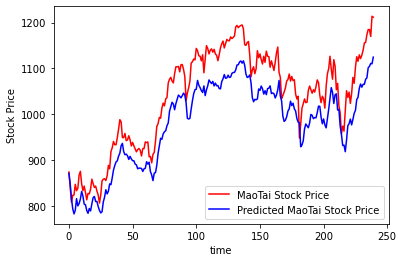

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense,SimpleRNN
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

maotai = pd.read_csv('./SH600519.csv')
training_set = maotai.iloc[0:2426-300,2:3].values
test_set = maotai.iloc[2426-300:,2:3].values

#归一化
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
test_set = sc.transform(test_set)

x_train = []
y_train = []
x_test = []
y_test = []
# 训练集处理
for i in range(60,len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(len(x_train),60,1))

#测试集处理
for i in range(60,len(test_set)):
    x_test.append(test_set[i-60:i,0])
    y_test.append(test_set[i,0])

x_test,y_test = np.array(x_test),np.array(y_test)
x_test = np.reshape(x_test,(len(x_test),60,1))


model = tf.keras.Sequential([
    SimpleRNN(80,return_sequences=True),
    Dropout(0.2),
    SimpleRNN(100),
    Dropout(0.2),
    Dense(1) 
])

model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
             loss = 'mean_squared_error')

history = model.fit(x_train,y_train,batch_size = 64,epochs=50,validation_data=(x_test,y_test),validation_freq=1)
model.summary()

predicted_stock_price = model.predict(x_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

real_stock_price = sc.inverse_transform(test_set[60:])
plt.plot(real_stock_price,color='red',label='MaoTai Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted MaoTai Stock Price')
plt.xlabel('time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

mse = mean_squared_error(predicted_stock_price,real_stock_price)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,real_stock_price))
mae = mean_absolute_error(predicted_stock_price,real_stock_price)
print('均方误差：%.6f'%mse)
print('均方根误差：%.6f'%rmse)
print('平均绝对误差：%.6f'%mae)

In [15]:
mse = mean_squared_error(predicted_stock_price,real_stock_price)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,real_stock_price))
mae = mean_absolute_error(predicted_stock_price,real_stock_price)
print('均方误差：%.6f'%mse)
print('均方根误差：%.6f'%rmse)
print('平均绝对误差：%.6f'%mae)

均方误差：3874.650635
均方根误差：62.246692
平均绝对误差：57.742753


### LSTM预测股票

In [ ]:
RNN通过记忆体实现短期记忆进行连续数据预测，但是当连续数据序列变长时，会使展开时间步过长，在反向传播更新参数时，梯度要按照时间步连续相乘，会导致梯度消失，
1997年，Hochereiter提出长短期记忆网络LSTM
输入门：it = sigma(wi*[ht-1,xt]+bi)
遗忘门：ft = sigma(wf*[ht-1,xt]+bf)
输出门：ot = sigma(wo*[ht-1,xt]+bo)
细胞态（长期记忆）：ct = ft*c(t-1) + it*ct_hat 
记忆体（短期记忆）：ht = ot*tanh(ct)
候选态（归纳出的新知识）：ct_hat = tanh(wc*[ht-1,xt]+bc)

听老师讲课，我现在脑袋中的记住的知识是今天ppt第1页到第45页的长期记忆ct，这个长期记忆ct由两部分组成：
第一部分是ppt1-44页的内容，也就是上一时刻的长期记忆ct-1，我不可能一字不差的记住全部内容，会不自觉的忘掉一些，所以上一个时刻的长期记忆ct-1要乘以遗忘门ft，ft*ct-1表示留存在我脑中的对过去的记忆；
第二部分是：老师现在讲的内容是新知识，是即将存入我脑中的现在的记忆，现在的记忆由两部分组成：
    一部分是老师正在讲的45页ppt，是当前时刻的输入xt,
    还有一部分是44页ppt的短期记忆留存ht-1，
我的脑袋把当前时刻的输入xt和上一时刻的短期记忆ht-1归纳形成即将存入我脑中的现在记忆ct_hat,
现在的记忆ct_hat乘以输入门和过去的记忆一同存贮为长期记忆
当我把这部分知识讲给我同学时，我不可能一字不拉讲，而是讲过输出门筛选后的内容，这就是记忆体的输出ht

当有多层循环网络时，第一层循环网络的输出ht就是第二层循环网络的输入xt,输入第二层网络的是第一层网络提取的精华，
可以认为：老师就是第一层循环网络，每一页ppt都是老师从论文中提取的精华，输出给我，
作为第二层循环网络的我，接收到的数据是老师长期记忆过tanh激活函数乘以输出门提取的短期记忆ht，



tf.keras.layers.LSTM(记忆体个数，return_sequences=是否返回输出) True表示各时间步输出ht,False表示仅最后时间步输出ht(默认)


In [ ]:
#只有两处和上一节RNN预测股票不同，导入包和搭建网络
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense,LSTM  #这里和上节不同
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

maotai = pd.read_csv('./SH600519.csv')
training_set = maotai.iloc[0:2426-300,2:3].values
test_set = maotai.iloc[2426-300:,2:3].values

#归一化
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
test_set = sc.transform(test_set)

x_train = []
y_train = []
x_test = []
y_test = []
# 训练集处理
for i in range(60,len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(len(x_train),60,1))

#测试集处理
for i in range(60,len(test_set)):
    x_test.append(test_set[i-60:i,0])
    y_test.append(test_set[i,0])

x_test,y_test = np.array(x_test),np.array(y_test)
x_test = np.reshape(x_test,(len(x_test),60,1))


model = tf.keras.Sequential([
    LSTM(80,return_sequences=True),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(1) 
])

model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
             loss = 'mean_squared_error')

history = model.fit(x_train,y_train,batch_size = 64,epochs=50,validation_data=(x_test,y_test),validation_freq=1)
model.summary()

predicted_stock_price = model.predict(x_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

real_stock_price = sc.inverse_transform(test_set[60:])
plt.plot(real_stock_price,color='red',label='MaoTai Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted MaoTai Stock Price')
plt.xlabel('time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

mse = mean_squared_error(predicted_stock_price,real_stock_price)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,real_stock_price))
mae = mean_absolute_error(predicted_stock_price,real_stock_price)
print('均方误差：%.6f'%mse)
print('均方根误差：%.6f'%rmse)
print('平均绝对误差：%.6f'%mae)

### GRU预测股票

In [ ]:
2014年Cho等优化Lstm提出GRU

更新门：zt = sigmoid(wz*[ht-1,xt])
重置门：rt = sigmoid(wr*[ht-1,xt])
记忆体：ht = (1-zt)*h(t-1) + zt*ht_hat
候选隐藏层：ht_hat = yanh(w*[rt*ht-1,xt])


tf.keras.layers.GRU(记忆体个数，return_sequences=是否返回输出),一般最后层用False,中间层用True

model = tf.keras.Sequential([
    GRU(80,return_sequences=True),
    Dropout(0.2),
    GRU(100),
    Dropout(0.2),
    Dense(1)
])